<a href="https://colab.research.google.com/github/thefr33radical/hybrid_forecasting/blob/master/code/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exponential Smoothing

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io
from sklearn.metrics import mean_squared_error as rms
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)

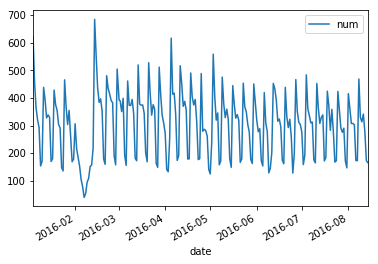

In [162]:
data.plot.line(x = 'date',y = 'num')
plt.show()

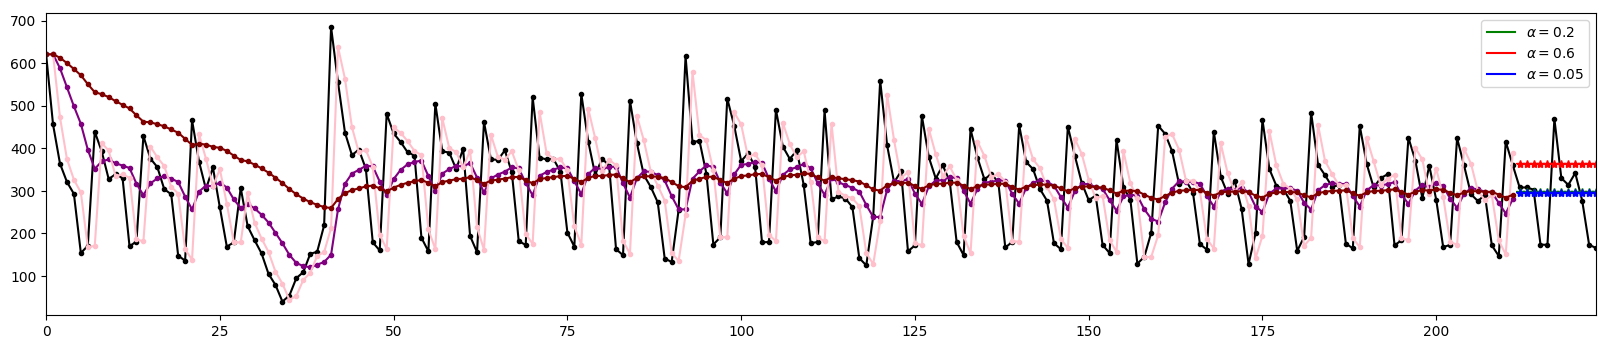

In [105]:
# Plot original Data Points
plt.figure(num=None, figsize=(20, 4), dpi=100,facecolor='w', edgecolor='k')
plt.plot(data["num"],marker='.',color="black")

values = data.iloc[:-12,1]

# Simple Exponential Smoothing ALPHA LEVEL 0.2
fit1 = SimpleExpSmoothing(values).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='*', color='green', legend=True)
fit1.fittedvalues.plot(marker='.',  color='purple')


# Simple Exponential Smoothing ALPHA LEVEL 0.9
fit2 = SimpleExpSmoothing(values).fit(smoothing_level=0.9,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='*', color='red', legend=True)
fit2.fittedvalues.plot(marker='.', color='pink')


# Simple Exponential Smoothing ALPHA LEVEL 0.05
fit3 = SimpleExpSmoothing(values).fit(smoothing_level=0.05,optimized=False)
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='*', color='blue', legend=True)
fit3.fittedvalues.plot(marker='.', color='maroon')

plt.show()

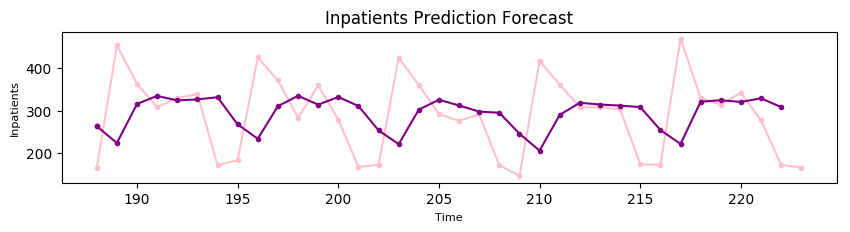

RMSE VALUE 13522.530307868969


In [296]:
# Rollling Forecast

# Number of days to Forecast Parameter
end =36
alpha=0.4
values = data.iloc[:-end,1]
actual_values = data.iloc[len(data)-end:,1]
pred_values=[]
indexes=[]

#print(actual_values,values )

for i in range(end):
  fit = SimpleExpSmoothing(values).fit(smoothing_level=alpha,optimized=False)
  fnext = fit.forecast(1)  
  indexes.append(fnext.index.values[0])
  pred_values.append(fnext.values[0])
  values = data.iloc[:-end+i,1]

pred_values=pd.Series(pred_values)
pred_values.index=indexes

#Doubt
#pred_values=pred_values.shift(-1)[:]
plt.figure(num=None, figsize=(10, 2), dpi=100,facecolor='w', edgecolor='k')
plt.xlabel('Time', fontsize=8)
plt.ylabel('Inpatients', fontsize=8)
plt.plot(actual_values,marker='.', color='pink')
plt.plot(pred_values,marker='.', color='purple')
plt.title("Inpatients Prediction Forecast",fontsize=12)
plt.show()

# Needs correction ??
print("RMSE VALUE",rms(actual_values,pred_values))
#print(actual_values,pred_values)

## Exponential Smoothing Resources
* https://github.com/thefr33radical/hybrid_forecasting/blob/master/data/parsed_inpatients.csv
* https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1
* https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

# ARIMA 

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, SARIMAX
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io
from sklearn.metrics import mean_squared_error as rms
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)



In [300]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA((data["num"]),(2, 0, 1))
arima_fit= model.fit()
print(arima_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                    num   No. Observations:                  224
Model:                     ARMA(2, 1)   Log Likelihood               -1364.010
Method:                       css-mle   S.D. of innovations            106.662
Date:                Mon, 29 Jul 2019   AIC                           2738.020
Time:                        09:51:32   BIC                           2755.078
Sample:                             0   HQIC                          2744.905
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.5013      9.411     32.248      0.000     285.055     321.947
ar.L1.num      0.0983      0.185      0.531      0.596      -0.265       0.461
ar.L2.num     -0.1453      0.104     -1.397      0.1

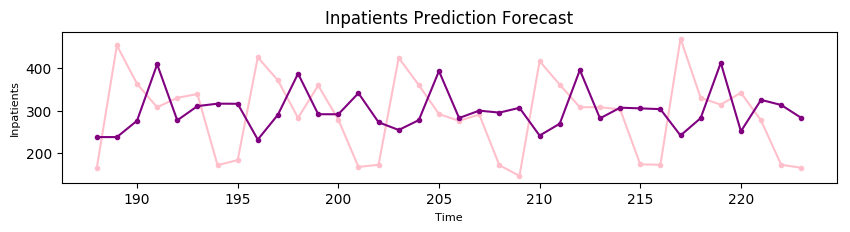

RMSE VALUE 13485.663794900312


In [297]:
# Rollling Forecast

# Number of days to Forecast Parameter
end =36
values = data.iloc[:-end,1]
actual_values = data.iloc[len(data)-end:,1]
pred_values=[]
indexes=data.iloc[len(data)-end:,1].index

for i in range(end):
  model = ARIMA((values),(2, 0, 1))
  arima_fit= model.fit()
  
  fnext = arima_fit.forecast()[0][0] 
  pred_values.append(fnext)
  values = data.iloc[:-end+i,1]

pred_values=pd.Series(pred_values)
pred_values.index=indexes

#Doubt
#pred_values=pred_values.shift(-1)[:]
plt.figure(num=None, figsize=(10, 2), dpi=100,facecolor='w', edgecolor='k')
plt.xlabel('Time', fontsize=8)
plt.ylabel('Inpatients', fontsize=8)
plt.plot(actual_values,marker='.', color='pink')
plt.plot(pred_values,marker='.', color='purple')
plt.title("Inpatients Prediction Forecast",fontsize=12)
plt.show()

# Needs correction ??
print("RMSE VALUE",rms(actual_values,pred_values))
#print(actual_values,pred_values)

# SARIMA

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, SARIMAX
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io
from sklearn.metrics import mean_squared_error as rms
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)



In [301]:
model=SARIMAX(endog=values,order=(2,0,1),seasonal_order=(0,1,1,7),enforce_invertibility=False)
sarima_fit= model.fit()
print(arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    num   No. Observations:                  224
Model:                     ARMA(2, 1)   Log Likelihood               -1364.010
Method:                       css-mle   S.D. of innovations            106.662
Date:                Mon, 29 Jul 2019   AIC                           2738.020
Time:                        09:51:42   BIC                           2755.078
Sample:                             0   HQIC                          2744.905
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.5013      9.411     32.248      0.000     285.055     321.947
ar.L1.num      0.0983      0.185      0.531      0.596      -0.265       0.461
ar.L2.num     -0.1453      0.104     -1.397      0.1

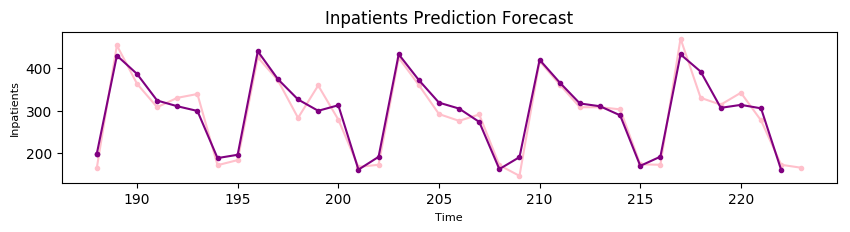

RMSE VALUE 12315.410859958429


In [298]:
# Rollling Forecast

# Number of days to Forecast Parameter
end =36
values = data.iloc[:-end,1]
actual_values = data.iloc[len(data)-end:,1]
pred_values=[]
indexes=[]

for i in range(end):
  model=SARIMAX(endog=values,order=(2,0,1),seasonal_order=(0,1,1,7),enforce_invertibility=False)
  sarima_fit= model.fit()
  fnext = sarima_fit.forecast(1)  
  indexes.append(fnext.index.values[0])
  pred_values.append(fnext.values[0])
  values = data.iloc[:-end+i,1]

pred_values=pd.Series(pred_values)
pred_values.index=indexes

#Doubt
#pred_values=pred_values.shift(-1)[:]
plt.figure(num=None, figsize=(10, 2), dpi=100,facecolor='w', edgecolor='k')
plt.xlabel('Time', fontsize=8)
plt.ylabel('Inpatients', fontsize=8)
plt.plot(actual_values,marker='.', color='pink')
plt.plot(pred_values,marker='.', color='purple')
plt.title("Inpatients Prediction Forecast",fontsize=12)
plt.show()

# Needs correction ??
print("RMSE VALUE",rms(actual_values,pred_values))
#print(actual_values,pred_values)

###SARIMA Links
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html
* https://medium.com/@rrfd/sarima-modelling-for-car-sharing-basic-data-pipelines-applications-with-python-pt-1-75de4677c0cd
* http://barnesanalytics.com/sarima-models-using-statsmodels-in-python
* https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
